In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('inmuebles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [5]:
df.head()

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN


In [6]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

In [7]:
df = df.drop(['Barrio', 'Datos Adicionales'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Area Terreno            463 non-null    float64
 5   Area Construida         463 non-null    float64
 6   Detalle Disponibilidad  463 non-null    object 
 7   Estrato                 463 non-null    object 
 8   Precio                  463 non-null    float64
 9   Tipo de Inmueble        463 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 36.3+ KB


In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Area Terreno            463 non-null    float64
 5   Area Construida         463 non-null    float64
 6   Detalle Disponibilidad  463 non-null    object 
 7   Estrato                 463 non-null    object 
 8   Precio                  463 non-null    float64
 9   Tipo de Inmueble        463 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 36.3+ KB


In [11]:
df.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,463.000000,4.630000e+02,463.000000,4.630000e+02
mean,18003.151188,1.515204e+04,87.517279,6.672032e+08
std,1992.191499,1.827101e+05,1137.469077,3.272992e+09
min,2575.000000,0.000000e+00,0.000000,4.650000e+06
25%,18184.500000,0.000000e+00,0.000000,1.230500e+07
50%,18332.000000,0.000000e+00,0.000000,1.587000e+07
75%,18539.500000,0.000000e+00,0.000000,1.379955e+08
max,19344.000000,3.217197e+06,22724.000000,4.523379e+10


In [12]:
rangos = [0, 1e7, 5e7, 1e8, 5e8, 1e9, float('inf')]

In [13]:
nombrerangos = ['<10M', '10M-50M', '50M-100M', '100M-500M', '500M-1000M','>1000M']

In [14]:
df['Rango_Precio'] = pd.cut(df['Precio'], rangos, labels = nombrerangos)

In [15]:
df.head()

,Codigo,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Rango_Precio
0,17180,BOGOTA,CUNDINAMARCA,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,>1000M
1,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,>1000M
2,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,>1000M
3,2575,SOGAMOSO,BOYACÁ,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,>1000M
4,11409,BUGA,VALLE DEL CAUCA,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,>1000M


In [16]:
print(df['Rango_Precio'].value_counts().sort_index())

Rango_Precio
<10M           69
10M-50M       259
50M-100M       13
100M-500M      45
500M-1000M     28
>1000M         49
Name: count, dtype: int64


array([[<Axes: title={'center': 'Codigo'}>,
        <Axes: title={'center': 'Area Terreno'}>],
       [<Axes: title={'center': 'Area Construida'}>,
        <Axes: title={'center': 'Precio'}>]], dtype=object)

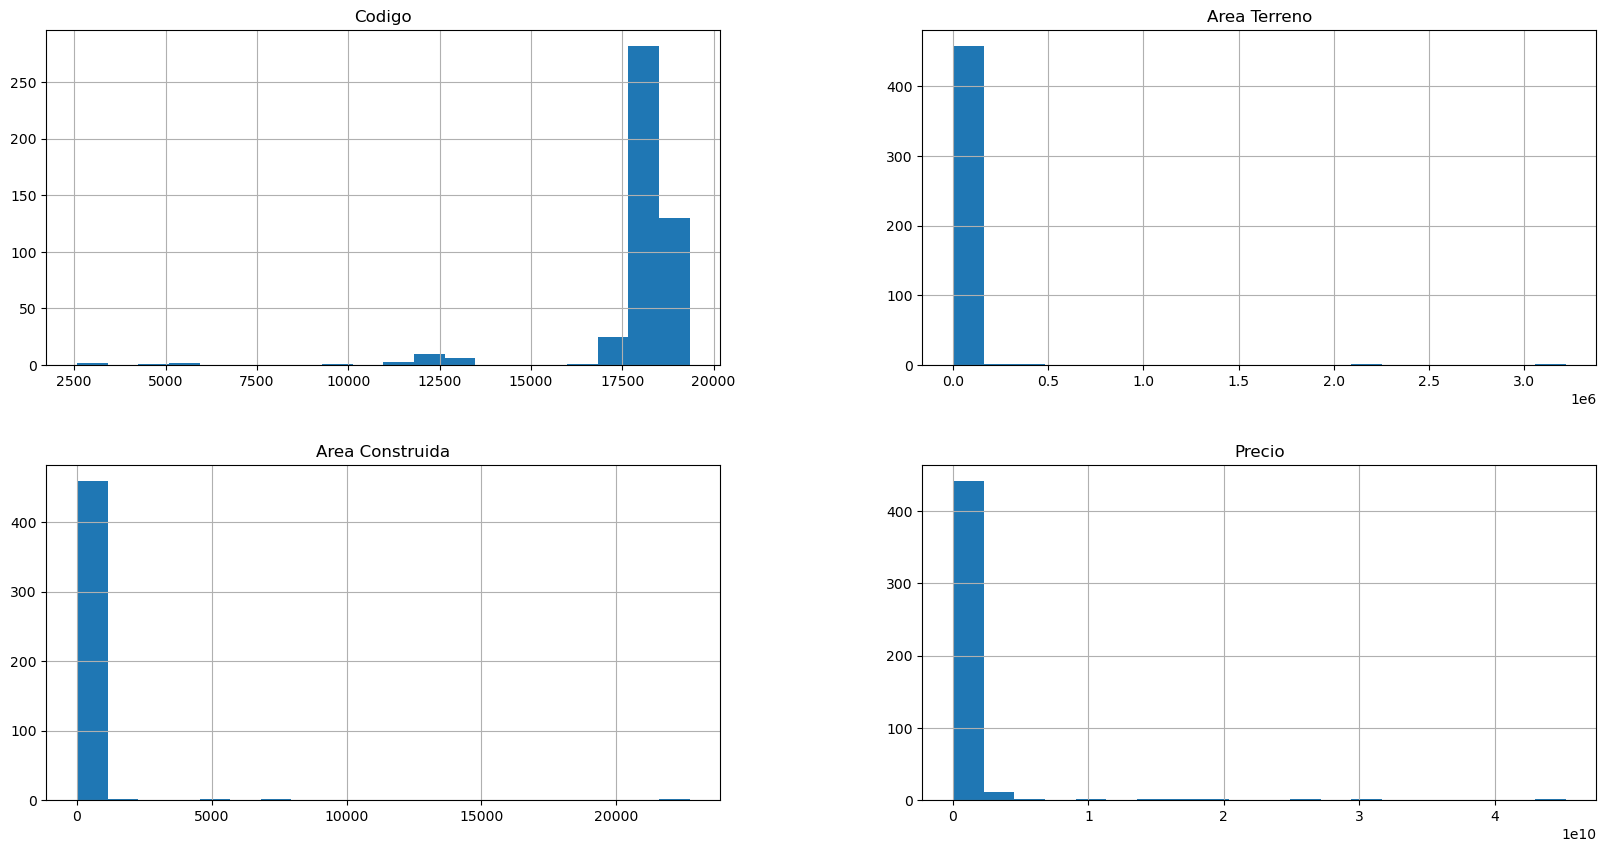

In [17]:
df.hist(bins=20, figsize=(20,10))

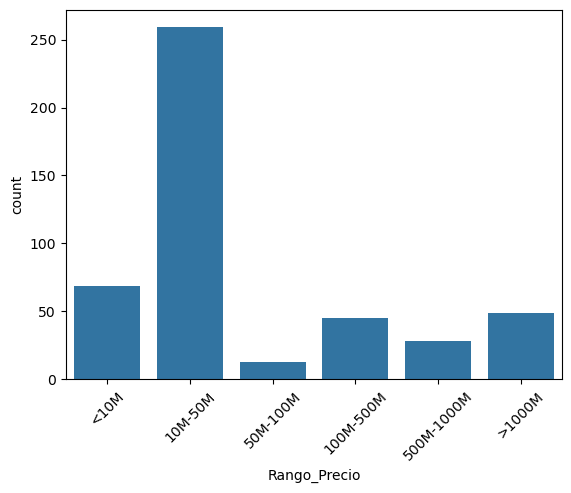

In [18]:
plt. Figure(figsize=(10,7)) 
sns.countplot(x= df.Rango_Precio)
plt.xticks(rotation=45)
plt.show()

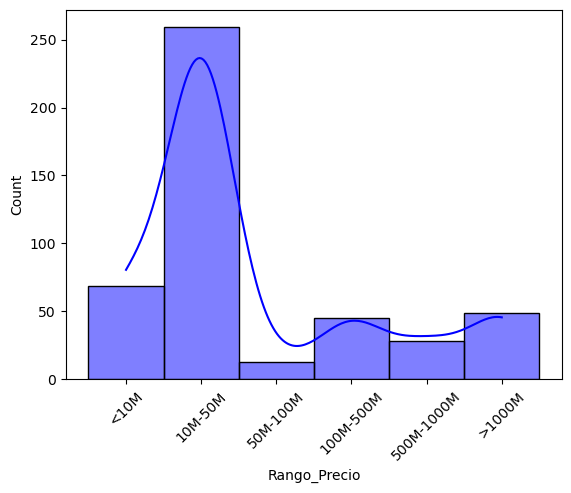

In [73]:
sns.histplot(df.Rango_Precio, color ="b", bins = 30, kde = True)
plt.xticks(rotation=45)
plt.show()

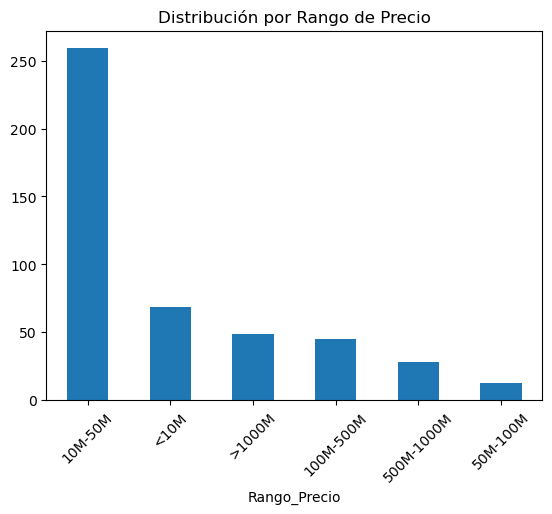

In [19]:
df['Rango_Precio'].value_counts().plot(kind='bar', title='Distribución por Rango de Precio')
plt.xticks(rotation=45)
plt.show()

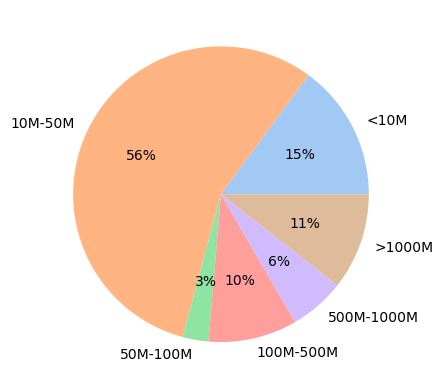

In [58]:
total_precio = df['Precio'].groupby(df['Rango_Precio'], observed = True).count()  
etiquetas = total_precio.index
colors = sns.color_palette('pastel')[0:6] 
plt.pie(total_precio, labels = etiquetas, colors = colors, 
autopct='%.0f%%') 
plt.show()

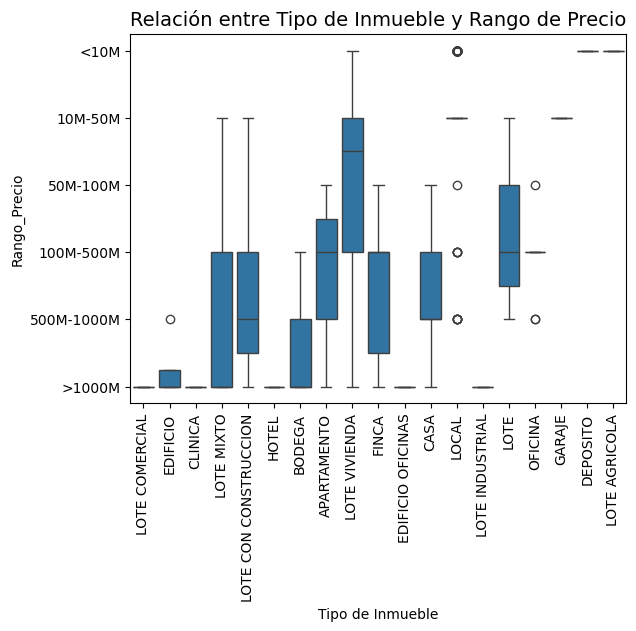

In [44]:
inmueble_valor = sns.boxplot(x=df["Tipo de Inmueble"], y=df["Rango_Precio"]) 
plt.xticks(rotation=90, ha='center')
plt.title("Relación entre Tipo de Inmueble y Rango de Precio", fontsize=14)
plt.show()

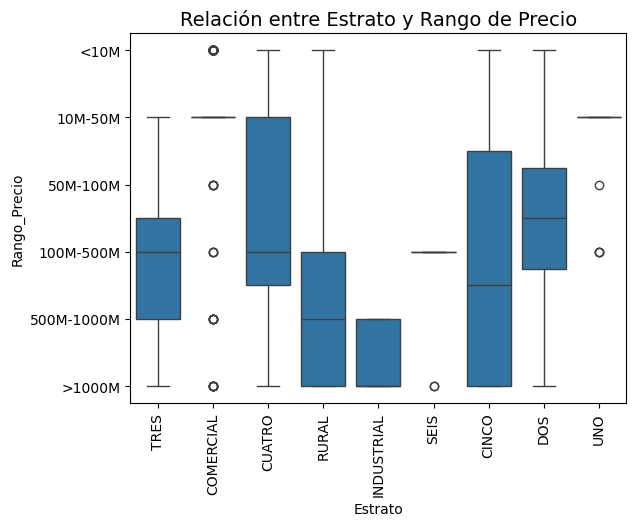

In [48]:
estrato_valor = sns.boxplot(x=df["Estrato"], y=df["Rango_Precio"]) 
plt.xticks(rotation=90, ha='center') 
plt.title("Relación entre Estrato y Rango de Precio", fontsize=14)
plt.show()

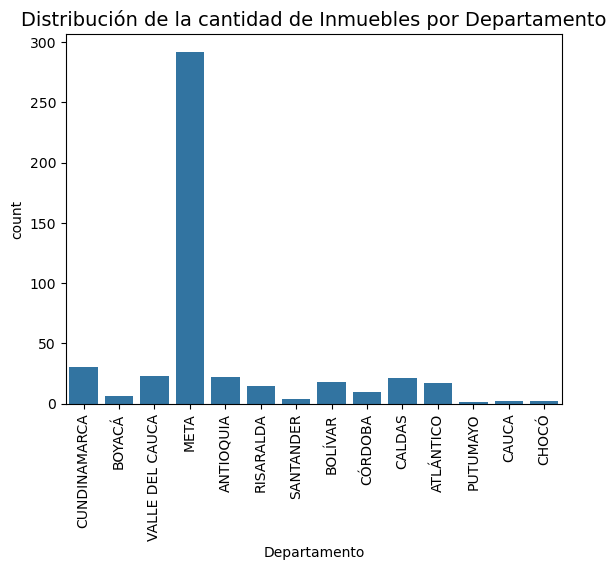

In [110]:
plt. Figure(figsize=(10,7)) 
sns.countplot(x= df.Departamento)
plt.title('Distribución de la cantidad de Inmuebles por Departamento', fontsize=14)
plt.xticks(rotation=90, ha='center')
plt.show()

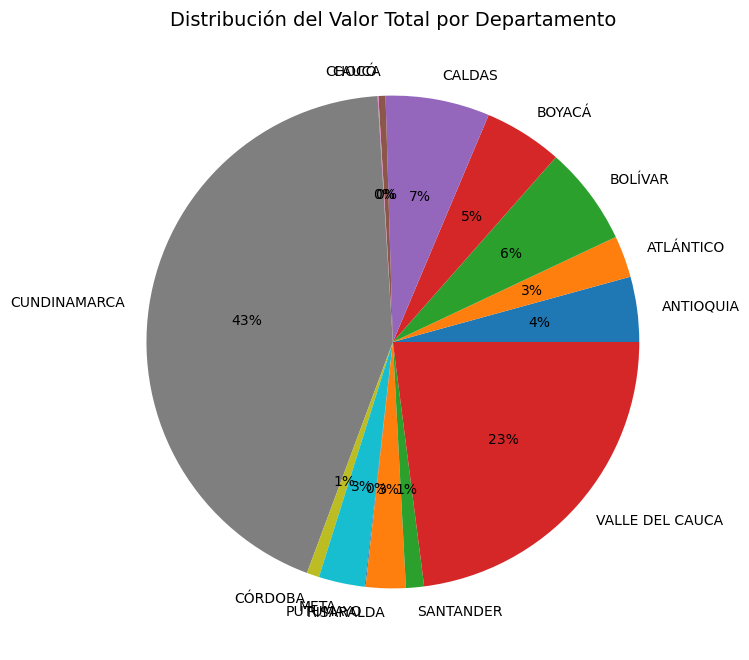

In [112]:
valor_total_por_departamento = df.groupby('Departamento')['Precio'].sum()
plt.figure(figsize=(10, 8)) 
plt.pie(valor_total_por_departamento.values, labels = valor_total_por_departamento.index, autopct ='%.0f%%',textprops={'fontsize': 10})
plt.title('Distribución del Valor Total por Departamento', fontsize=14)
plt.show()

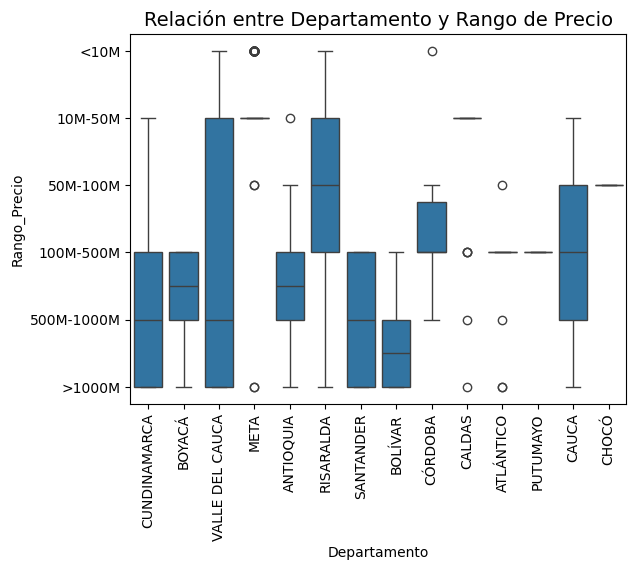

In [114]:
departamento_valor = sns.boxplot(x=df["Departamento"], y=df["Rango_Precio"]) 
plt.xticks(rotation=90, ha='center') 
plt.title("Relación entre Departamento y Rango de Precio", fontsize=14)
plt.show()

In [118]:
precio_promedio_por_estrato = df.groupby('Estrato')['Precio'].mean().sort_values(ascending=False)

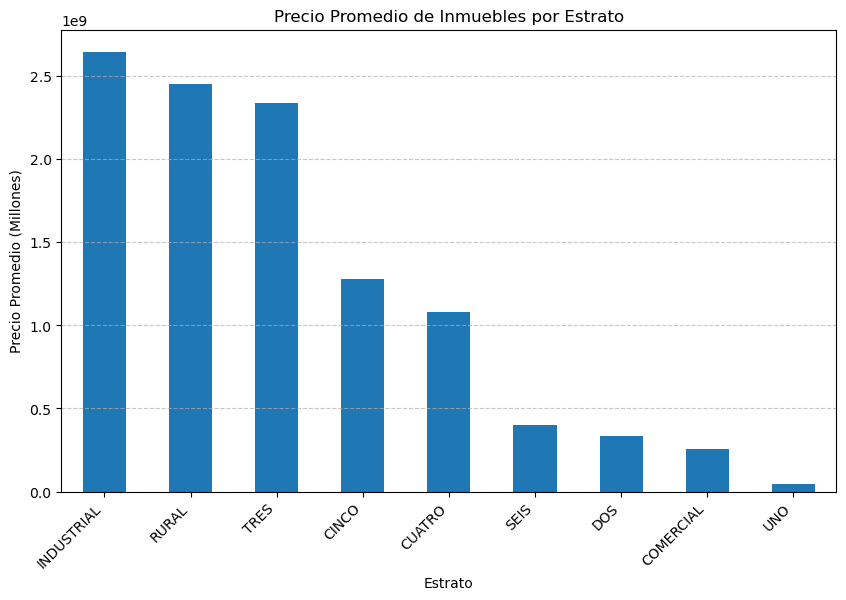

In [122]:
plt.figure(figsize=(10, 6))
precio_promedio_por_estrato.plot(
    kind='bar',
    title='Precio Promedio de Inmuebles por Estrato',
    xlabel='Estrato',
    ylabel='Precio Promedio (Millones)'
)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [130]:
# Calcular estadísticas descriptivas por estrato
resumen_estratos = df.groupby('Estrato')['Precio'].agg(['mean', 'median', 'count', 'std'])
resumen_estratos.columns = ['Precio_Promedio', 'Mediana', 'Cantidad_Inmuebles', 'Desviación_Estándar']
print(resumen_estratos.sort_values('Precio_Promedio', ascending=False))

            Precio_Promedio       Mediana  Cantidad_Inmuebles  \
Estrato                                                         
INDUSTRIAL     2.646415e+09  1.196702e+09                  16   
RURAL          2.450882e+09  6.008017e+08                  40   
TRES           2.335573e+09  4.531800e+08                  19   
CINCO          1.278927e+09  4.022590e+08                  10   
CUATRO         1.082890e+09  1.300992e+08                  19   
SEIS           4.014502e+08  2.132058e+08                  15   
DOS            3.364024e+08  9.973110e+07                  16   
COMERCIAL      2.555727e+08  1.230500e+07                 307   
UNO            4.438472e+07  1.123200e+07                  21   

            Desviación_Estándar  
Estrato                          
INDUSTRIAL         6.088799e+09  
RURAL              7.213616e+09  
TRES               6.704815e+09  
CINCO              1.729947e+09  
CUATRO             3.125763e+09  
SEIS               5.228122e+08  
DOS         

In [132]:
# Calcular estadísticas descriptivas por estrato
resumen_estratos = df.groupby('Estrato')['Precio'].agg(['mean', 'median', 'count', 'std'])
resumen_estratos.columns = ['Precio_Promedio', 'Mediana', 'Cantidad_Inmuebles', 'Desviación_Estándar']
resumen_estratos = resumen_estratos / 1e6
print(resumen_estratos.sort_values('Precio_Promedio', ascending=False))

            Precio_Promedio      Mediana  Cantidad_Inmuebles  \
Estrato                                                        
INDUSTRIAL      2646.415343  1196.702315            0.000016   
RURAL           2450.882122   600.801654            0.000040   
TRES            2335.572575   453.180000            0.000019   
CINCO           1278.926980   402.259000            0.000010   
CUATRO          1082.890305   130.099200            0.000019   
SEIS             401.450223   213.205760            0.000015   
DOS              336.402400    99.731100            0.000016   
COMERCIAL        255.572675    12.305000            0.000307   
UNO               44.384724    11.232000            0.000021   

            Desviación_Estándar  
Estrato                          
INDUSTRIAL          6088.799486  
RURAL               7213.616248  
TRES                6704.814997  
CINCO               1729.946718  
CUATRO              3125.762509  
SEIS                 522.812183  
DOS                  49

<Axes: >

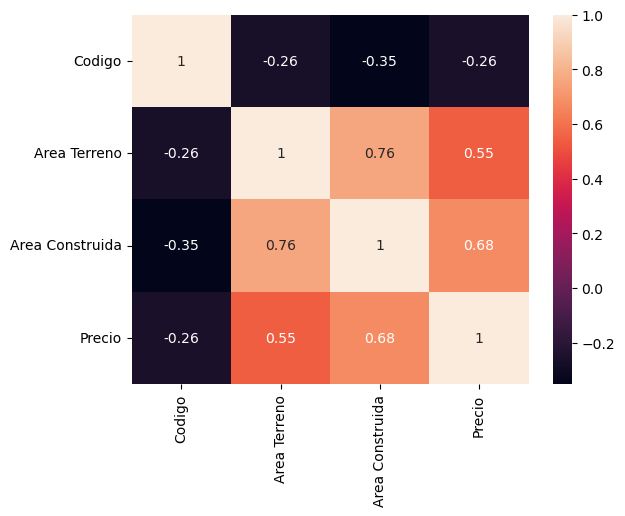

In [135]:
correlacion = df.corr(numeric_only=True)
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)